<a href="https://colab.research.google.com/github/Shaikmd3797/Linear-Regression-problems/blob/main/Brain_vs_Body_Weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***introduction***


 # ***Brain vs. Body Weight***

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### *** Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

# ***import modules and read the datafile***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_fwf('brain_body.txt')
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


# ***1st jar of machine learning is data***

1. *cleaning*
2. *encoding*
3. *splitting*
4. *scaling*

# ***1) cleaning the data***

In [ ]:
df.isnull().sum() # finding the missing the values

Brain    0
Body     0
dtype: int64

In [ ]:
df=df.drop_duplicates() #drop the duplicate data then stored the data into df
df.shape

(62, 2)

In [ ]:
df.dtypes #checking the correct format in each column 
# checking the structured data. htis data contain columns and rows properly

Brain    float64
Body     float64
dtype: object

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
q1=df['Brain'].quantile(0.25)  # 25 th quantile
q3=df['Brain'].quantile(0.75)  # 75 th quantile
iqr= q3-q1  #iqr value
upper= q3+1.5 * iqr
lower = q1 -1.5* iqr
print("the range value is :" ,lower, upper) # the values are outliers which is out of range
outliers=[x for x in df['Brain'] if x< lower or x>upper] # cliping the outliers to upper and lower threshold
outliers

the range value is : -70.80375000000001 119.60625


[465.0, 2547.0, 187.1, 521.0, 529.0, 207.0, 6654.0, 250.0, 192.0, 160.0]

In [ ]:
for x in ['Brain']:
   df.loc[df[x]<lower,x]=np.nan
   df.loc[df[x]>2000,x]=np.nan    # in this dataset 10 outliers are there romoving of all outliers are affect the result so we remove the extreme outliers which is beyond 2000

In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df=df.dropna()
df.describe()

,Brain,Body
count,60.000000,60.000000
mean,52.066317,120.655333
std,119.468888,228.212145
min,0.005000,0.140000
25%,0.532500,3.975000
50%,3.150000,16.250000
75%,35.332500,128.875000
max,529.000000,1320.000000


# **cleaning the completed next step is EDA**

#***2) EDA***

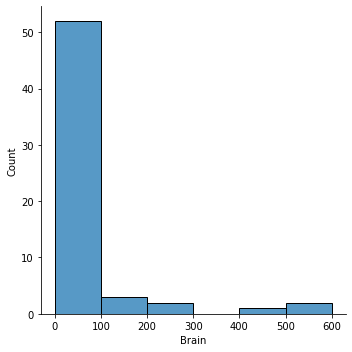

In [ ]:
sns.displot(df,x='Brain',binwidth=100)

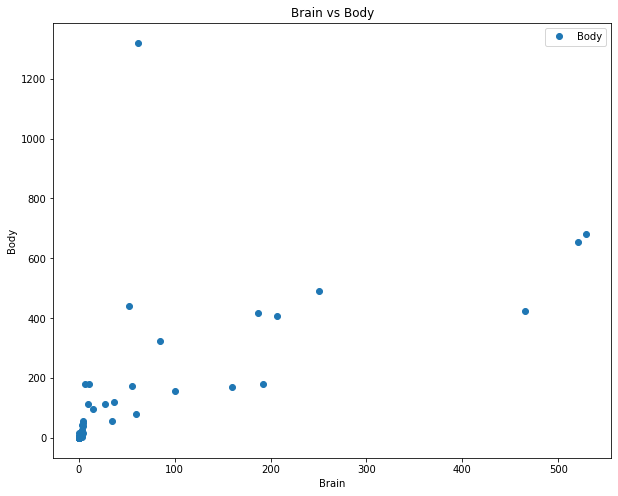

In [ ]:
df.plot(x='Brain',y='Body',style='o', figsize=(10,8))
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.650559
Body,0.650559,1.000000


# ***the correlation between feature and target variable is more than 0.2 or less than -0.2 is considered as a linear pattern***

#***3)encoding***

#***encoding is not needed for this data because this data contains only continous values.***

# ***4) splitting the data for train and test***

In [ ]:
X=df['Brain'].values
y=df['Body'].values

In [ ]:
from sklearn.model_selection import train_test_split # import necessasary package

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=107)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[5.000e-03]
 [1.350e+00]
 [1.000e+01]
 [6.200e+01]
 [5.210e+02]
 [2.500e+00]
 [2.300e-02]
 [5.216e+01]
 [9.000e-01]
 [1.700e+00]
 [4.800e-02]
 [2.800e-01]
 [1.040e-01]
 [1.600e+02]
 [3.500e+00]
 [1.620e+00]
 [1.871e+02]
 [3.300e+00]
 [4.250e-01]
 [7.500e-02]
 [2.070e+02]
 [4.650e+02]
 [3.633e+01]
 [4.190e+00]
 [1.055e+01]
 [6.800e+00]
 [1.920e+02]
 [8.500e+01]
 [7.850e-01]
 [3.000e+00]
 [2.300e-02]
 [2.000e+00]
 [3.500e+00]
 [6.000e+01]
 [1.400e+00]
 [5.550e+01]
 [4.050e+00]
 [9.200e-01]
 [6.000e-02]
 [1.483e+01]
 [1.410e+00]
 [4.288e+00]]
[[4.235e+00]
 [7.500e-01]
 [3.600e+00]
 [5.500e-01]
 [3.385e+00]
 [1.200e-01]
 [2.500e+02]
 [2.000e-01]
 [1.040e+00]
 [1.010e-01]
 [4.800e-01]
 [1.220e-01]
 [2.766e+01]
 [1.000e+02]
 [5.290e+02]
 [1.000e+00]
 [3.500e+01]
 [1.000e-02]]
[[1.400e-01]
 [8.100e+00]
 [1.150e+02]
 [1.320e+03]
 [6.550e+02]
 [1.210e+01]
 [4.000e-01]
 [4.400e+02]
 [2.600e+00]
 [6.300e+00]
 [3.300e-01]
 [1.900e+00]
 [2.500e+00]
 [1.690e+02]
 [3.900e+00]
 [1.140e+01]
 [4.190e+0

# ***5)scaling the data***

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

In [ ]:
scaler.fit(X_train) # scaling is not mandatory for linear regression
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

# ***2nd jar is task***

**this is supervised learning problem because we predict the target variable**

**feature is continous data so it is regression problem**

# ***3rd jar - model (linear regression***

# 1.  **linear model is y=mx+c**

# ***4th jar - loss function***
# ***5th jar - learning***


---





In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()
reg.fit(X_train_scale,y_train)

LinearRegression()

In [ ]:
coeff_df=reg.coef_  # best value of m
coeff_df

array([[132.99260462]])

In [ ]:
reg.intercept_ # best value of c

array([132.61595238])

In [ ]:
y_predict=reg.predict(X_test_scale)
y_predict

array([[ 77.00311227],
       [ 72.91028131],
       [ 76.25735971],
       [ 72.67539862],
       [ 76.00486082],
       [ 72.17040082],
       [365.63283976],
       [ 72.2643539 ],
       [ 73.25086122],
       [ 72.14808697],
       [ 72.59318967],
       [ 72.17274965],
       [104.5137479 ],
       [189.47081863],
       [693.29419906],
       [ 73.20388468],
       [113.1339428 ],
       [ 72.04121534]])

# ***6th jar - evalute the model

In [ ]:
from sklearn import metrics
print("R2 score is :",metrics.r2_score(y_test,y_predict))

R2 score is : 0.8823592517013348


In [ ]:
reg.score(X_test_scale,y_test)

0.8823592517013348

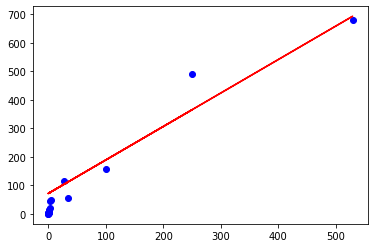

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_predict, color='red')